<a href="https://colab.research.google.com/github/tanishkamaurya/Customer-Segmentation-Analysis/blob/main/Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install kagglehub

In [5]:
import kagglehub

# Download dataset from Kaggle using kagglehub
path = kagglehub.dataset_download("vjchoudhary7/customer-segmentation-tutorial-in-python")

print("Path to dataset files:", path)

100%|██████████| 1.55k/1.55k [00:00<00:00, 1.95MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python/versions/1


In [6]:
import pandas as pd
import os

# Construct full file path
csv_path = os.path.join(path, "Mall_Customers.csv")

# Load the dataset
df = pd.read_csv(csv_path)

# Display first few rows
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [8]:
df.shape

(200, 5)

In [9]:
print("Number of Rows",df.shape[0])
print("Number of Columns",df.shape[1])

Number of Rows 200
Number of Columns 5


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [11]:
df.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [12]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


# Kmeans Clutering

In [13]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [14]:
X = df[['Annual Income (k$)','Spending Score (1-100)']]

In [15]:
X.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [16]:
from sklearn.cluster import KMeans

In [17]:
k_means = KMeans()
k_means.fit(X)

KMeans()

In [18]:
k_means = KMeans(n_clusters=5)
k_means.fit_predict(X)

array([0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 0,
       0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 1, 2, 1, 2, 1, 2,
       1, 2], dtype=int32)

### Elbow method to find optimal clusters

In [19]:
wcss=[]
for i in range(1,11):
    k_means = KMeans(n_clusters=i)
    k_means.fit(X)
    wcss.append(k_means.inertia_)

In [20]:
wcss

[269981.28000000014,
 183811.2827701642,
 106348.37306211119,
 73880.64496247198,
 44448.45544793369,
 38797.9027638142,
 30273.394312070028,
 25354.360937251142,
 21932.392044240973,
 24189.482513841318]

In [21]:
import matplotlib.pyplot as plt

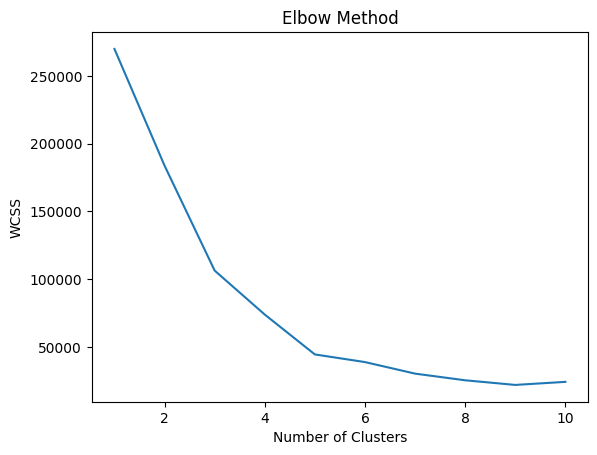

In [22]:
plt.plot(range(1,11),wcss)
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

## Model Training

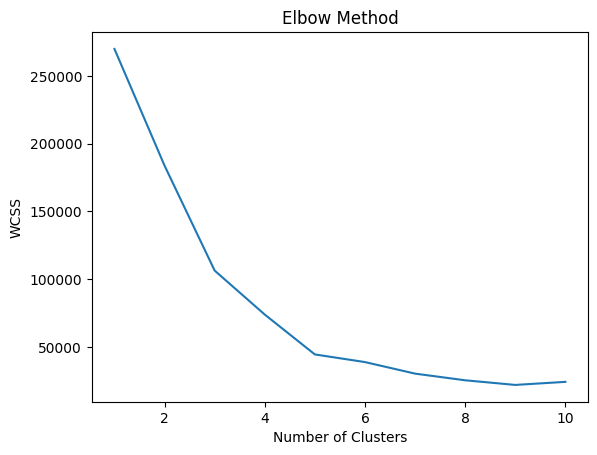

In [23]:
plt.plot(range(1,11),wcss)
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

In [24]:
k_means = KMeans(n_clusters=5,random_state=42)
y_means = k_means.fit_predict(X)

In [25]:
y_means

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 0,
       4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 0, 1, 3, 1, 3, 1,
       0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1], dtype=int32)

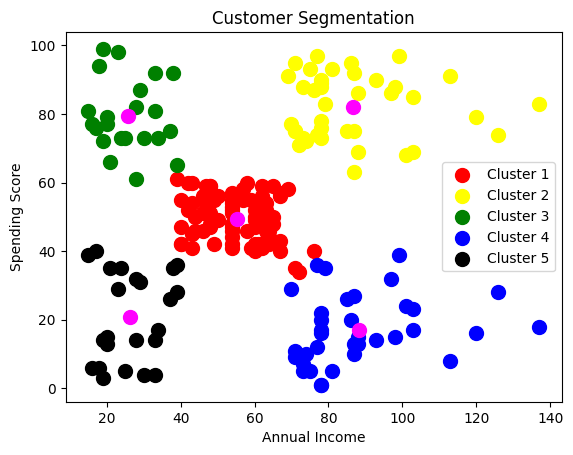

In [26]:
plt.scatter(X.iloc[y_means==0,0],X.iloc[y_means==0,1],s=100,c='red',label="Cluster 1")
plt.scatter(X.iloc[y_means==1,0],X.iloc[y_means==1,1],s=100,c='yellow',label="Cluster 2")
plt.scatter(X.iloc[y_means==2,0],X.iloc[y_means==2,1],s=100,c='green',label="Cluster 3")
plt.scatter(X.iloc[y_means==3,0],X.iloc[y_means==3,1],s=100,c='blue',label="Cluster 4")
plt.scatter(X.iloc[y_means==4,0],X.iloc[y_means==4,1],s=100,c='black',label="Cluster 5")
plt.scatter(k_means.cluster_centers_[:,0],k_means.cluster_centers_[:,1],s=100,c="magenta")
plt.title("Customer Segmentation")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.legend()
plt.show()

In [27]:
k_means.predict([[15,39]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([4], dtype=int32)

In [28]:
import joblib

In [29]:
joblib.dump(k_means,"customer_segmentation")

['customer_segmentation']

In [30]:
model = joblib.load("customer_segmentation")

In [31]:
model.predict([[15,39]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([4], dtype=int32)

In [32]:
from tkinter import *
import joblib

In [33]:
def show_entry_fields():
    p1=int(e1.get())
    p2=int(e2.get())

    model = joblib.load('Customer Segmentation')
    result=model.predict([[p1,p2]])
    print("This Customer belongs to cluster no: ", result[0])

    if result[0] == 0:
        Label(master, text="Customers with medium annual income and medium annual spend").grid(row=31)
    elif result[0]==1:
        Label(master, text="Customers with high annual income but low annual spend").grid(row=31)
    elif result[0]==2:
        Label(master, text="Customers with low annual income and low annual spend").grid(row=31)
    elif result[0]==3:
        Label(master, text="Customers low annual income but high annual spend").grid(row=31)
    elif result[0]==4:
        Label(master, text="Customers with high annual income and high annual spend").grid(row=31)

master = Tk()
master.title("Customer Segmentation Using Machine Learning")


label = Label(master, text = "Customer Segmentation Using Machine Learning"
                          , bg = "black", fg = "white"). \
                               grid(row=0,columnspan=2)

Label(master,text="Annual Income").grid(row=1)
Label(master, text="Spending Score").grid(row=2)


e1 = Entry(master)
e2 = Entry(master)

e1.grid(row=1, column=1)
e2.grid(row=2, column=1)

Button(master, text='Predict', command=show_entry_fields).grid()

mainloop()

TclError: no display name and no $DISPLAY environment variable